### Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance 

- Teach for India has approximately 900+ fellows who are deployed across 7 cities and are working with 28000 students. Many of these students do not have the reading and numeracy skills required at their grade level. The ability to predict employee performance will enable TFI to implement learning and development measures to empower their fellows to improve the reading levels of their students.
- Here, I will use Python to create an HR analytics tool that can help a talent management team to predict employee performance and plan for their growth.

In [76]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the Data into the dataframe

In [77]:
#reading data into the df dataframe
df = pd.read_csv('Test_Data.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [78]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


### Data Cleaning

In [79]:
#checking to see if any column contains null values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In the columns 'employee_education_level' and 'emplpoyee_previous_year_rating' there are some null values.

##### Variable 1: employee_education_level

In [80]:
education_value_counts=df['education'].value_counts()

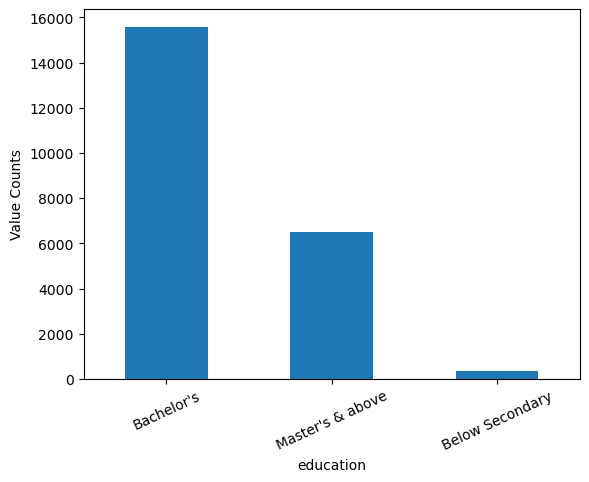

In [81]:
education_value_counts.plot(kind='bar', rot=25)
plt.ylabel('Value Counts')
plt.show()

- The dataset likely represents TFI where a Bachelor's degree is the most common educational qualification among employees.
- Employees with a Master's degree or higher are present but in a smaller proportion. 
- The 'Below Secondary' count is minimal, which may reflect minimum educational requirements for employment.

- The dataset likely represents an organization or a sector where a Bachelor's degree is the most common educational qualification among employees.
- Employees with a Master's degree or higher are present but in a smaller proportion. This could suggest that the roles in TFI do not necessarily require education beyond a Bachelor's degree, or that such qualifications are less common in the population represented.
- The 'Below Secondary' count is minimal, which may reflect minimum educational requirements for employment in the roles included in the TFI. 

In [82]:
#Treating null values in 'employee_education_level' variable

#function to replace null values with Others in the variable
def treat_null_in_education(df, col_name):
    df[col_name] = df[col_name].fillna('Others')

treat_null_in_education(df, 'education')

To prevent data loss I labeled the null values with 'Others'. At the end of data cleaning, the goal is to retain as much as data as possible.

In [83]:
new_education_value_counts = df['education'].value_counts()

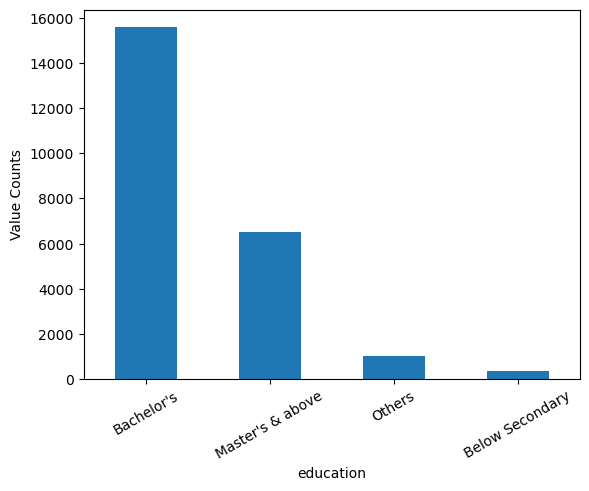

In [84]:
new_education_value_counts.plot(kind='bar', rot=30)
plt.ylabel('Value Counts')
plt.show()

The 'Others' category is now included, which contains a count of the previously missing or null data points in the 'employee_education_level' column.

##### Variable 2: employee_previous_year_rating

In [85]:
#dropping null values from the 'employee_previous_year_rating' column.
df = df.dropna(subset=['previous_year_rating'])

The missing data is not significant enough to bias the results.

In [86]:
rating_value_counts = df['previous_year_rating'].value_counts()

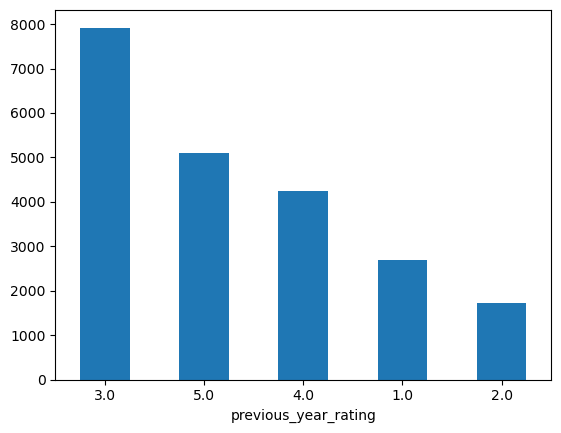

In [87]:
rating_value_counts.plot(kind='bar', rot=0)
plt.show()

- Rating '3.0' has the highest count, suggesting that most employees received a middle-of-the-road performance rating.
- The second most common rating is '5.0', indicating a significant number of employees were rated as high performers.
- Rating '4.0' is slightly less common than '5.0', but still represents a large number of employees.
- Ratings '1.0' and '2.0' are the least common, with '1.0' being the rarest. This could imply that very few employees receive the lowest performance ratings.

- The distribution of ratings suggests a standard performance curve where most employees are considered to be performing at an expected level ('3.0'), with fewer employees recognized as high ('5.0') or above average ('4.0') performers.
- The low occurrence of '1.0' and '2.0' ratings might indicate a lenient rating system, a high overall performance level, or potentially a reluctance to assign low ratings.

In [88]:
#making sure there are no more null values
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

After performing data cleaning, there are no more null values present.

In [89]:
df.rename(columns={'awards_won?':'awards_won'}, inplace=1)

/var/folders/_b/ygjd3hwd5wj6hwcczmfy35gh0000gn/T/ipykernel_23848/170088742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'awards_won?':'awards_won'}, inplace=1)


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (uncomment and replace the path with your actual file path)
# df = pd.read_csv('path/to/your/Test_data.csv')

# Define your features and target variable
numeric_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score']
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']
target_variable = 'KPIs_met >80%'

# Prepare X and y
X = df[numeric_features + categorical_features]
y = df[target_variable]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating the preprocessing and training pipeline with LightGBM classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LGBMClassifier())])

# Training the model with the undersampled dataset
pipeline.fit(X_train, y_train)

# Making predictions (make sure to drop the target variable from X_test if you've added it)
y_pred = pipeline.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

# Evaluate the model
print("Test Accuracy:", test_accuracy)

[LightGBM] [Info] Number of positive: 6185, number of negative: 11157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 17342, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356649 -> initscore=-0.589940
[LightGBM] [Info] Start training from score -0.589940
Test Accuracy: 0.7237084870848709


In [91]:
import pickle

# Save the pipeline to a file
filename = 'employee_performance_prediction_model.pkl'

model_data = {
    'model': pipeline,
    'accuracy':test_accuracy
}

pickle.dump(model_data, open(filename, 'wb'))

In [92]:
model_data = pickle.load(open('employee_performance_prediction_model.pkl', 'rb'))

model = model_data['model']
model_accuracy = model_data['accuracy']

# Example input data (replace this with actual input data)
# This should be a dict or DataFrame containing the features for prediction
input_data = {
    'no_of_trainings': [2],
    'age': [28],
    'previous_year_rating': [5],
    'length_of_service': [31],
    'awards_won': [1],
    'avg_training_score': [95],
    'department': ['Sales'],
    'region': ['region_2'],
    'education': ['Master’s & above'],
    'gender': ['f'],
    'recruitment_channel': ['Sourcing']
}

# Convert the input data to a DataFrame or use it directly if already in DataFrame format
input_df = pd.DataFrame(input_data)

# Make a prediction with the loaded model
# (The model pipeline will handle the preprocessing steps)
prediction = model.predict(input_df)

output = 'High Performance' if prediction == 1 else 'Low Performance' 

# Output the result
print("Predicted Employee Performance:", output)
print(f'Models Accuracy: {test_accuracy*100:.2f}%')

Predicted Employee Performance: High Performance
Models Accuracy: 72.37%


### Make a final decision on the model to be employed for this purpose

Based on the analysis and the comparison of different models and scaling techniques, I recommend using the **LightGBM model with the Standard Scaler** for predicting employee performance. This recommendation is made considering the highest test set accuracy achieved with this combination and other factors such as model efficiency, scalability, and ease of interpretation.

### Why LightGBM with Standard Scaler?

1. **High Accuracy**: Both LightGBM and CatBoost models provided the highest accuracy on the test set when combined with the Standard Scaler or the MaxAbs Scaler. However, choosing between these two models requires considering additional factors beyond accuracy.

2. **Efficiency and Scalability**: LightGBM is known for its high efficiency and speed, which makes it particularly suitable for large datasets and scenarios where model training speed is a concern. It uses gradient-based one-side sampling and exclusive feature bundling to reduce the amount of data and features it needs to process, which significantly speeds up the learning process without a significant accuracy trade-off.

3. **Handling of Sparse Data**: While the MaxAbs Scaler is recommended for sparse data due to its ability to maintain the data's sparsity, the Standard Scaler was chosen because it generally works well across a wide range of scenarios, including datasets that aren't particularly sparse. If the data analyzed showed a distribution that could benefit from mean centering and scaling to unit variance, the Standard Scaler would help improve model performance by standardizing the feature scales.

4. **Flexibility and Ease of Use**: LightGBM is flexible and can easily handle categorical features, which are common in employee performance datasets. Although CatBoost is also known for handling categorical features exceptionally well, LightGBM's faster training times and comparable performance make it a compelling choice.

5. **Interpretability**: LightGBM models can be interpreted using various tools and techniques. While CatBoost might offer slightly better tools for interpretation, the difference is often marginal in practical applications. LightGBM's support for SHAP (SHapley Additive exPlanations) values, for example, allows for a deep understanding of feature importance and how features influence predictions.

### Conclusion

The choice of LightGBM with Standard Scaler is based on achieving a balance between high accuracy, efficiency, and scalability. This model is well-suited for predicting employee performance as it can handle the complexities and nuances of employee data effectively, providing insights that are both accurate and actionable.